### GPU, cuda, gccの確認


In [9]:
!nvidia-smi
!nvcc --version
!gcc --version

Mon Nov 24 13:19:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.195.03             Driver Version: 570.195.03     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8             10W /   90W |     580MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### パッケージのインストール / クリーンインストール
ssh先のjupyter環境などで実行の場合は, 当該環境にパッケージをインストール

In [3]:
# クリーンが必要であれば実行
!rm -rf kineticEQ
!rm -rf build

In [4]:
# インストール
!git clone https://github.com/Minamium/kineticEQ.git
!pip install -e ./kineticEQ

Cloning into 'kineticEQ'...
remote: Enumerating objects: 1118, done.
remote: Counting objects: 100% (253/253), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1118 (delta 125), reused 206 (delta 81), pack-reused 865 (from 1)
Receiving objects: 100% (1118/1118), 485.32 KiB | 5.99 MiB/s, done.
Resolving deltas: 100% (575/575), done.
Obtaining file:///home/arlm/workspace/kineticEQ
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for kineticEQ (pyproject.toml) ... done
  Created wheel for kineticEQ: filename=kineticeq-0.4.0-0.editable-py3-none-any.whl size=2710 sha256=b4022407657c1a16d93e59edd0f0e77460e8af406d21a1c1c26781fda7ce5160
  Stored in directory: /tmp/pip-ephem-wheel-cache-h8afjw0a/wheels/5c/8f/4c/777f8eab2b3d762127884b756300580189ab20868ab32d31f6
Successfully built kineticEQ
  Attem

### 動作確認

--- compile cuSOLVER ---
--- compile LO block-tridiag backend ---
--- LO block-tridiag backend loaded ---
initiaze complete:
  solver: implicit
  implicit solver: holo
  ho_iter: 64, ho_tol: 1e-06
  lo_iter: 64, lo_tol: 1e-06
 ---- hyperparameter ----
  hyperparameter: tau_tilde=5e-09
 ---- space ----
  space: nx=1000, dx=0.0010, Lx=1.0
 ---- velocity ----
  velocity: nv=200, dv=0.1005, v_max=10.0
 ---- time ----
  time: nt=101, dt=0.0005, T_total=0.05
  dtype: torch.float64
  device: cuda, GPU name: NVIDIA GeForce RTX 3070 Laptop GPU


No modifications detected for re-loaded extension module gtsv_batch, skipping build step...
Loading extension module gtsv_batch...
No modifications detected for re-loaded extension module lo_blocktridiag, skipping build step...
Loading extension module lo_blocktridiag...
NoneType: None


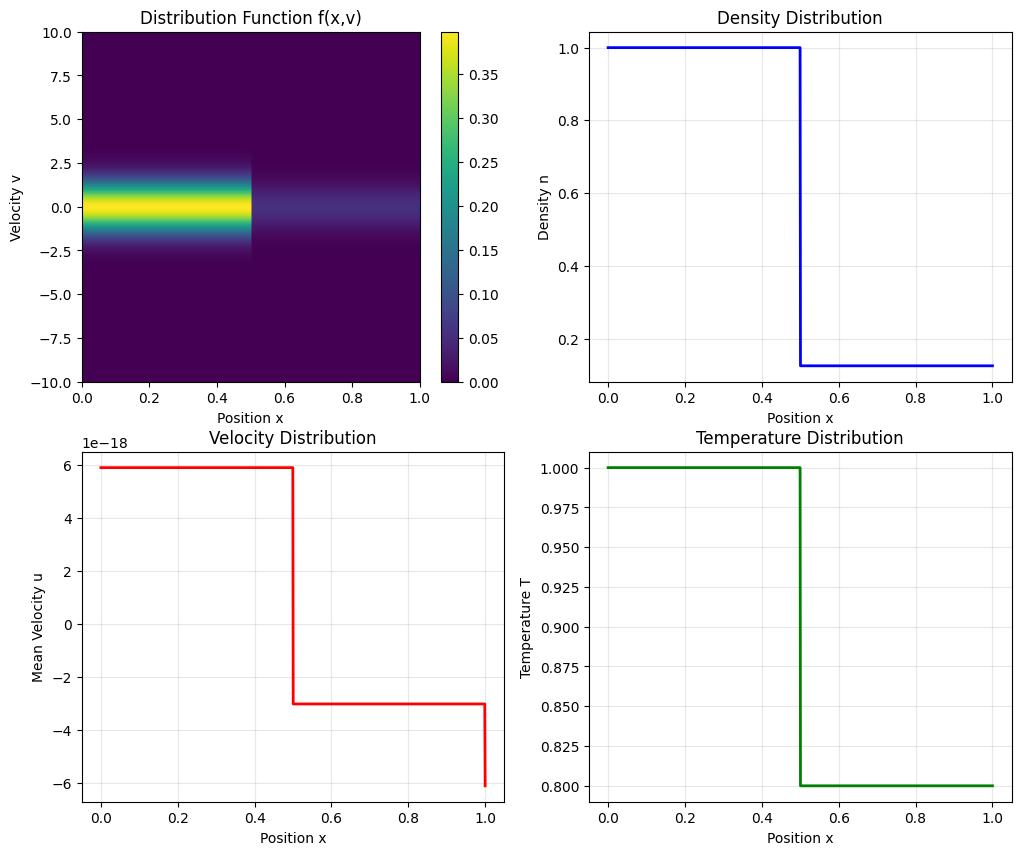

Density: mean=0.5625, min=0.1250, max=1.0000
Velocity: mean=0.0000, min=-0.0000, max=0.0000
Temperature: mean=0.9000, min=0.8000, max=1.0000
--- run simulation ---
--- Starting implicit time evolution ---
CFL number: 4.9950


Implicit Evolution:   0%|                                                                 | 0/101 [00:00<?, ?it/s]

Step     0/100 (t=0.000)
Picard iteration:     3, residual: 5.077255e-11
LO iteration: [16, 16, 16], residual: [6.507401979771732e-07, 6.507064492511372e-07, 6.507064493899151e-07]


Implicit Evolution:  10%|█████▌                                                  | 10/101 [00:01<00:14,  6.29it/s]

Step    10/100 (t=0.005)
Picard iteration:     2, residual: 9.588204e-07
LO iteration: [20, 20], residual: [8.370700868565173e-07, 8.370693972969967e-07]


Implicit Evolution:  20%|███████████                                             | 20/101 [00:02<00:09,  8.30it/s]

Step    20/100 (t=0.010)
Picard iteration:     2, residual: 9.574263e-07
LO iteration: [20, 20], residual: [6.002500488877516e-07, 6.002583977093856e-07]


Implicit Evolution:  30%|████████████████▋                                       | 30/101 [00:04<00:10,  6.84it/s]

Step    30/100 (t=0.015)
Picard iteration:     3, residual: 7.886927e-12
LO iteration: [19, 19, 19], residual: [7.239968159156174e-07, 7.239930549518547e-07, 7.239930547298101e-07]


Implicit Evolution:  40%|██████████████████████▏                                 | 40/101 [00:05<00:10,  5.87it/s]

Step    40/100 (t=0.020)
Picard iteration:     3, residual: 7.871481e-12
LO iteration: [19, 19, 19], residual: [8.450076902921655e-07, 8.450172204743644e-07, 8.450172198082306e-07]


Implicit Evolution:  50%|███████████████████████████▋                            | 50/101 [00:07<00:08,  5.84it/s]

Step    50/100 (t=0.025)
Picard iteration:     3, residual: 6.786391e-12
LO iteration: [19, 19, 19], residual: [6.066203437904427e-07, 6.066374906854577e-07, 6.066374897695237e-07]


Implicit Evolution:  59%|█████████████████████████████████▎                      | 60/101 [00:09<00:06,  5.90it/s]

Step    60/100 (t=0.030)
Picard iteration:     3, residual: 7.919526e-12
LO iteration: [19, 19, 19], residual: [7.863853725420533e-07, 7.863893329018712e-07, 7.863893322912485e-07]


Implicit Evolution:  69%|██████████████████████████████████████▊                 | 70/101 [00:11<00:05,  5.90it/s]

Step    70/100 (t=0.035)
Picard iteration:     3, residual: 6.444026e-12
LO iteration: [19, 19, 19], residual: [7.254095186204346e-07, 7.254234463127673e-07, 7.254234454523445e-07]


Implicit Evolution:  79%|████████████████████████████████████████████▎           | 80/101 [00:12<00:03,  6.00it/s]

Step    80/100 (t=0.040)
Picard iteration:     3, residual: 7.572824e-12
LO iteration: [19, 19, 19], residual: [6.681491782067894e-07, 6.681470749447804e-07, 6.681470746949802e-07]


Implicit Evolution:  89%|█████████████████████████████████████████████████▉      | 90/101 [00:14<00:01,  5.94it/s]

Step    90/100 (t=0.045)
Picard iteration:     3, residual: 7.473355e-12
LO iteration: [19, 19, 19], residual: [7.803187581922888e-07, 7.803278880835762e-07, 7.803278873064201e-07]


Implicit Evolution:  99%|██████████████████████████████████████████████████████▍| 100/101 [00:16<00:00,  5.92it/s]

Step   100/100 (t=0.050)
Picard iteration:     3, residual: 6.609858e-12
LO iteration: [18, 18, 18], residual: [9.799802379306666e-07, 9.800055287001452e-07, 9.80005527340122e-07]


Implicit Evolution: 100%|███████████████████████████████████████████████████████| 101/101 [00:16<00:00,  6.21it/s]

Time evolution completed!
--- run simulation complete, Result is saved in self.f ---


<Figure size 640x480 with 0 Axes>

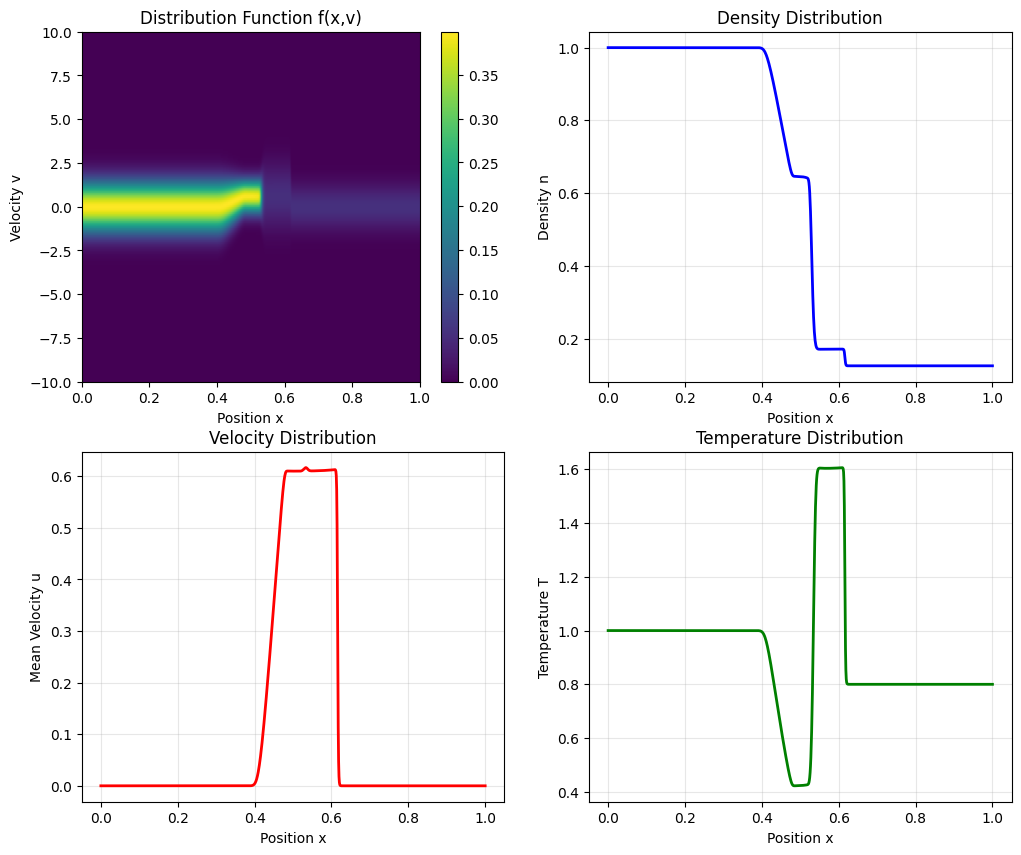

Density: mean=0.5625, min=0.1250, max=1.0000
Velocity: mean=0.1050, min=-0.0000, max=0.6167
Temperature: mean=0.9194, min=0.4222, max=1.6063
Creating GIF with 11 frames...
  Frame 3/11 processed
  Frame 6/11 processed
  Frame 9/11 processed
GIF saved: 'base_bench.gif' (11 frames)


<Figure size 640x480 with 0 Axes>

In [ ]:
# import packages
%run kineticEQ/tests/base/base_test.py --T_total 0.05 --tau_tilde 5e-8 --dt 5e-4 --lo_iter 64 --lo_tol 1e-6 --ho_iter 64 --ho_tol 1e-6